In [197]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [198]:
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [199]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE FROM 'Fires' WHERE fire_year >= 2009 ORDER BY FIRE_YEAR ASC", cnx)

In [200]:
df.STAT_CAUSE_DESCR.value_counts()

Debris Burning       129276
Miscellaneous        115023
Lightning             71604
Arson                 57768
Missing/Undefined     48534
Equipment Use         38895
Campfire              23713
Children              11976
Smoking               11464
Powerline              9980
Fireworks              4527
Railroad               3895
Structure              1904
Name: STAT_CAUSE_DESCR, dtype: int64

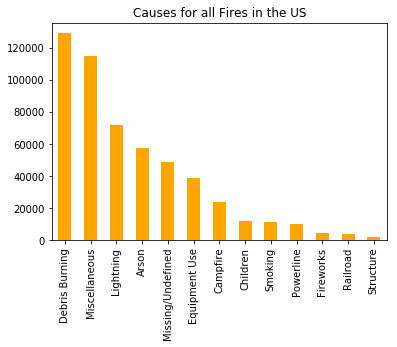

In [201]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='orange',title="Causes for all Fires in the US")

plt.show()

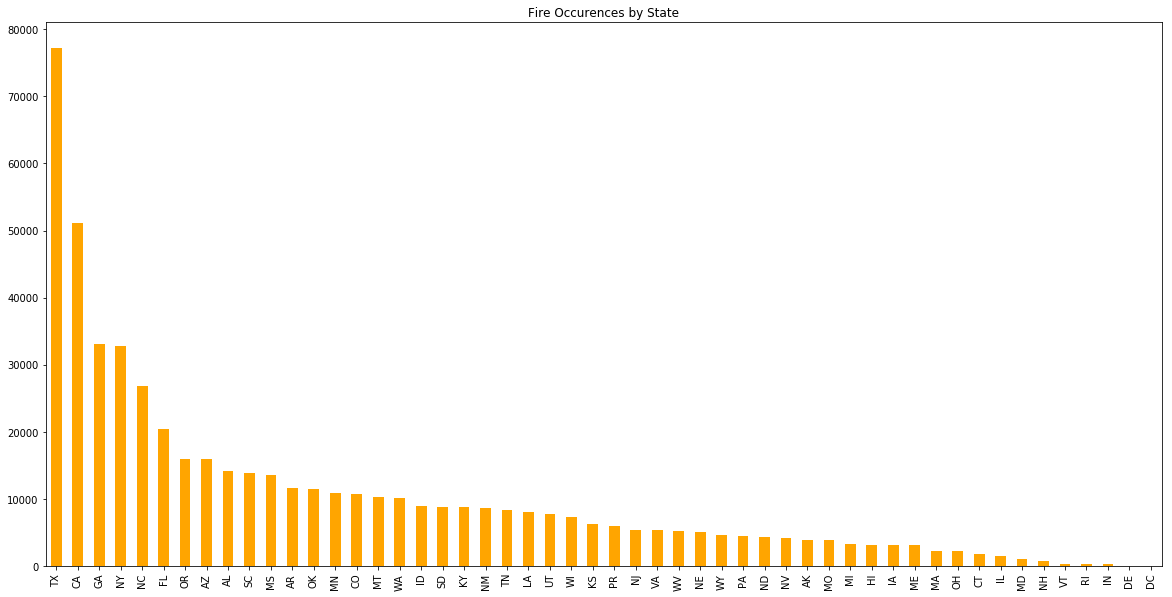

In [202]:
df['STATE'].value_counts().plot(kind='bar',color='orange',figsize=(20,10),title="Fire Occurences by State")
plt.show()

In [203]:
df_CA = df[df['STATE']=='CA']

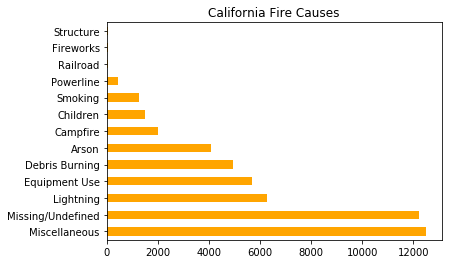

In [204]:
df_CA["STAT_CAUSE_DESCR"].value_counts().plot(kind="barh",color="orange",title="California Fire Causes")
plt.show()

In [205]:
states = df.STATE.unique()
states = np.array(states).tolist()
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015]
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

In [206]:
sample_data = df.sample(n=10)
sample_data

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE
222452,2011,Equipment Use,32.089918,-88.227030,AL,2455568.5,1406,1.0
410901,2014,Campfire,37.782661,-83.010948,KY,2456740.5,1952,5.0
157975,2010,Missing/Undefined,40.255933,-121.222470,CA,2455421.5,1601,0.1
163445,2011,Arson,34.696111,-94.798611,OK,2455770.5,1815,1.0
467192,2015,Missing/Undefined,44.027800,-123.381100,OR,2457300.5,1508,0.1
301752,2012,Missing/Undefined,32.600529,-116.770048,CA,2455978.5,1203,0.1
97410,2010,Miscellaneous,40.902290,-73.843612,NY,2455523.5,None,0.1
1525,2009,Miscellaneous,37.373889,-83.949722,KY,2454926.5,0800,114.5
427608,2014,Debris Burning,32.452874,-99.454570,TX,2456815.5,None,0.5
406458,2014,Equipment Use,37.573445,-81.656335,WV,2456780.5,1715,0.5


In [223]:
df.replace("None", np.nan)
df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE
0,2009,Arson,34.531111,-83.421111,GA,2454836.5,1200,16.00
1,2009,Miscellaneous,33.386389,-81.516389,SC,2454837.5,1655,0.25
2,2009,Miscellaneous,33.216667,-81.463611,SC,2454838.5,1415,0.10
3,2009,Arson,34.618333,-90.626111,AR,2454837.5,1200,0.10
4,2009,Miscellaneous,35.675000,-94.378056,AR,2454839.5,1830,4.00
5,2009,Equipment Use,34.287778,-111.140278,AZ,2454844.5,1146,0.10
6,2009,Miscellaneous,36.267222,-121.803056,CA,2454836.5,1035,0.01
7,2009,Arson,34.839444,-94.798333,OK,2454843.5,1400,15.00
8,2009,Miscellaneous,34.117222,-94.738889,OK,2454846.5,1125,0.10
9,2009,Arson,35.669167,-94.433611,AR,2454845.5,1300,35.00


In [220]:
df = df[~df['DISCOVERY_TIME'].isin(['None'])]
df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE
0,2009,Arson,34.531111,-83.421111,GA,2454836.5,1200,16.00
1,2009,Miscellaneous,33.386389,-81.516389,SC,2454837.5,1655,0.25
2,2009,Miscellaneous,33.216667,-81.463611,SC,2454838.5,1415,0.10
3,2009,Arson,34.618333,-90.626111,AR,2454837.5,1200,0.10
4,2009,Miscellaneous,35.675000,-94.378056,AR,2454839.5,1830,4.00
5,2009,Equipment Use,34.287778,-111.140278,AZ,2454844.5,1146,0.10
6,2009,Miscellaneous,36.267222,-121.803056,CA,2454836.5,1035,0.01
7,2009,Arson,34.839444,-94.798333,OK,2454843.5,1400,15.00
8,2009,Miscellaneous,34.117222,-94.738889,OK,2454846.5,1125,0.10
9,2009,Arson,35.669167,-94.433611,AR,2454845.5,1300,35.00
